---
layout: default
title: Notes and Samples on Python Topics
description: posted by ghbcode on 2014/06/3
---

# Download Financial data using Quandl

Quandl is an aggregation of many financial data sources. Much of the data is free and some is available on a subscription basis. It is perhaps the best place to get started with when looking for micro or macroeconomic data.  Below is an example of the [Quandl](https://www.quandl.com/) functionality and usage.  

In [1]:
%matplotlib inline

from datetime import datetime
from pandas_datareader.data import DataReader
from pandas import DataFrame
from pandas.tseries.offsets import BMonthEnd, Week

# Data and function definitions
dtEnd = datetime.today()
dtStart = datetime(dtEnd.year - 1, dtEnd.month, dtEnd.day)
maWindow = 50


def print_current_value(source, data):
    ''' Output the last value of the series passed by data '''
    header = data.columns[0]                     
    print("In {3} {0} = {1} for {2}.".format(header, data[header].values[0], data.index[0].date(), source))   
    
def print_describe(df, option):
    ''' Ouput detailes about the data '''
    for key, value in df.items():
        details =  df[key].describe()
        if option == 'detailed':
            print(details)
        else: 
            print("min = {}".format(details['min']))
            print("max = {}".format(details['max']))
            print("mean = {}".format(details['mean']))

In Quandl CBOE/VIX = 9.42 for 2017-12-15.
min = 9.14
max = 16.04
mean = 11.165577689243028


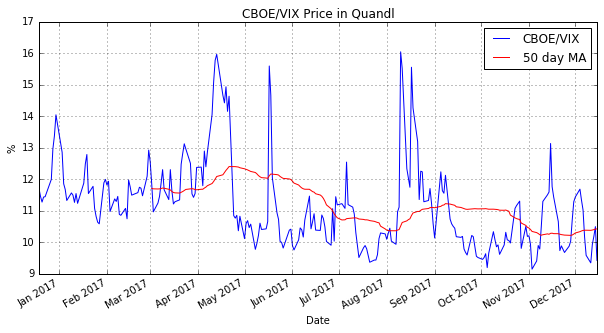

In [2]:
import quandl
auth_tok = "yourkey"

#Set up dict with Dataset names, Quandl Codes, and empty lists for our data
diTickers = {'CBOE/VIX': 'VIX Close'}
dataDict = {}
source = "Quandl"

# ----------------------------------------------
# Load Fund Price and Return Data
# ----------------------------------------------
for fund, metric in diTickers.items():
    if (metric is not None):
        dataDict[fund] = quandl.get(fund, authtoken=auth_tok, trim_start=dtStart, trim_end=dtEnd)[metric]
    else: 
        dataDict[fund] = quandl.get(fund, authtoken=auth_tok, trim_start=dtStart, trim_end=dtEnd)
    
# output graph
for key, value in dataDict.items():  
    dfValues = DataFrame(dataDict).dropna(how='any', axis=0)
    dfValues["{} day MA".format(maWindow)] = dfValues.rolling(window=maWindow, center=False).mean()
    # Output information about the data
    print_current_value(source, dfValues.tail(1))
    print_describe(dataDict, option='lean')
    # Show a graph of the data 
    ax = dfValues.plot(figsize=(10,5), grid=True, title='{0} Price in {1}'.format(key, source), color=["b","r"])
    ax.set_ylabel("%")

In [3]:
# Print describe information
print_describe(dataDict, option='detailed')

count    251.000000
mean      11.165578
std        1.365818
min        9.140000
25%       10.160000
50%       10.960000
75%       11.710000
max       16.040000
Name: VIX Close, dtype: float64
